#Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Data Set


In [85]:

df = pd.read_csv("train.csv")
df.drop(['id', 'gravity'], axis=1)



,ph,osmo,cond,urea,calc,target
0,6.19,443,14.8,124,1.45,0
1,5.40,703,23.6,394,4.18,0
2,6.13,371,24.5,159,9.04,0
3,4.91,442,20.8,398,6.63,1
4,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...
409,5.21,527,21.4,75,1.53,0
410,5.53,577,19.7,224,0.77,0
411,6.28,455,22.2,270,7.68,1
412,7.12,325,12.6,75,1.03,1


#Plot


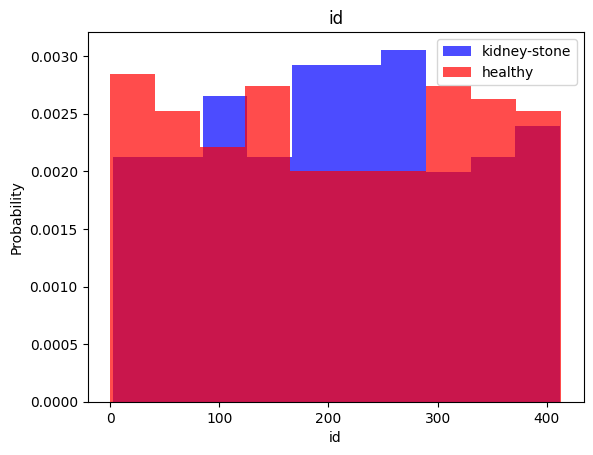

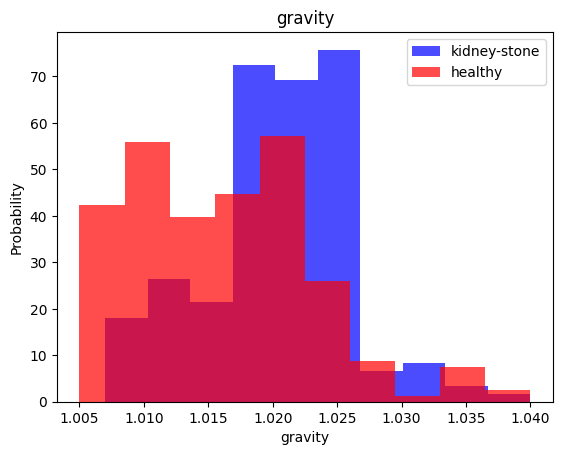

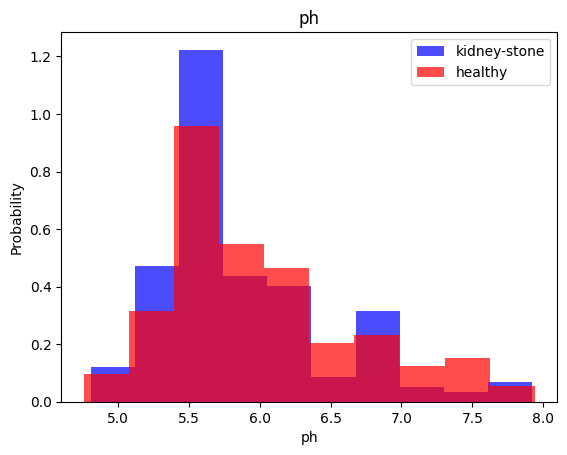

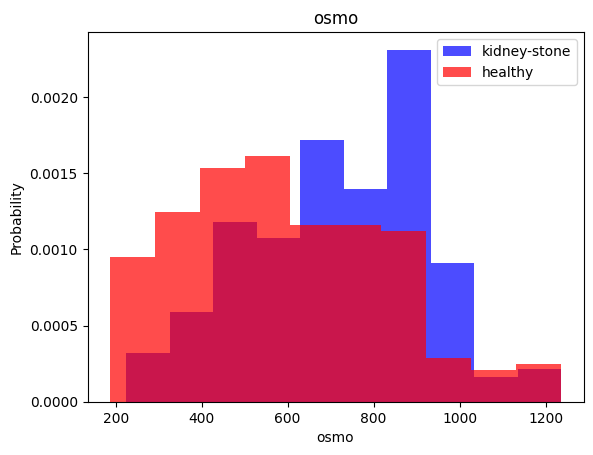

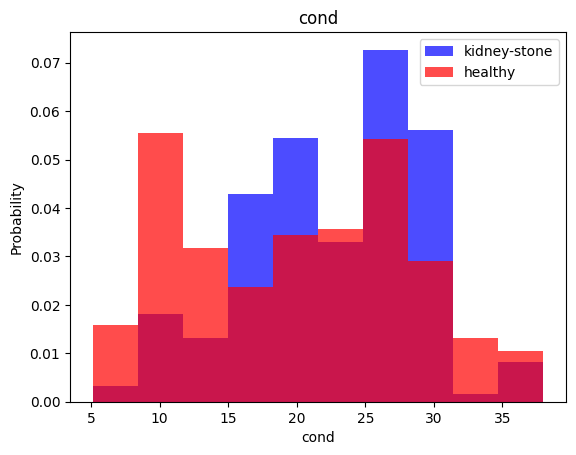

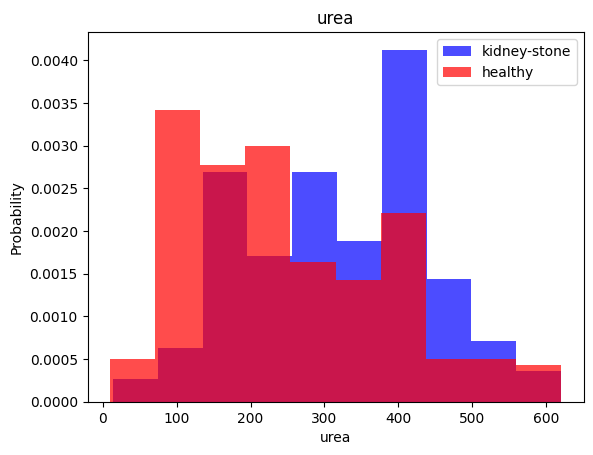

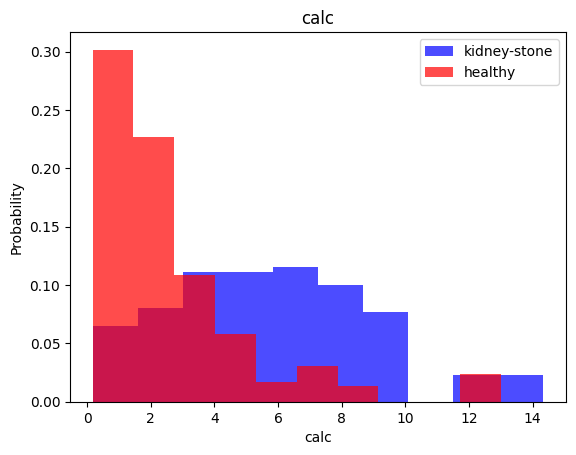

In [86]:
for label in cols[:-1]:
  plt.hist(df[df["target"]==1][label], color='blue', label='kidney-stone', alpha=0.7, density=True)
  plt.hist(df[df["target"]==0][label], color='red', label='healthy', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets


In [87]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [88]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [89]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

#KNN


In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [103]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [104]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74        42
           1       0.74      0.68      0.71        41

    accuracy                           0.72        83
   macro avg       0.72      0.72      0.72        83
weighted avg       0.72      0.72      0.72        83



#Naive Bayes Method


In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [108]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        42
           1       0.70      0.78      0.74        41

    accuracy                           0.72        83
   macro avg       0.73      0.72      0.72        83
weighted avg       0.73      0.72      0.72        83



#SVM


In [109]:
from sklearn.svm import SVC

In [110]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [111]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        42
           1       0.78      0.68      0.73        41

    accuracy                           0.75        83
   macro avg       0.75      0.75      0.75        83
weighted avg       0.75      0.75      0.75        83



#Neural Net

In [126]:
import tensorflow as tf

In [128]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [151]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(7,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

(270, 7)
(270,)
16 nodes, dropout 0, lr 0.01, batch size 32


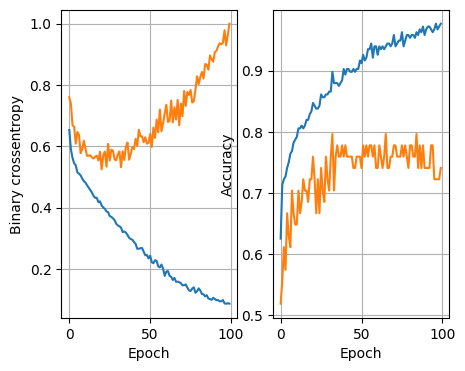

3/3 [==============================] - 0s 5ms/step - loss: 2.0940 - accuracy: 0.5663
16 nodes, dropout 0, lr 0.01, batch size 64


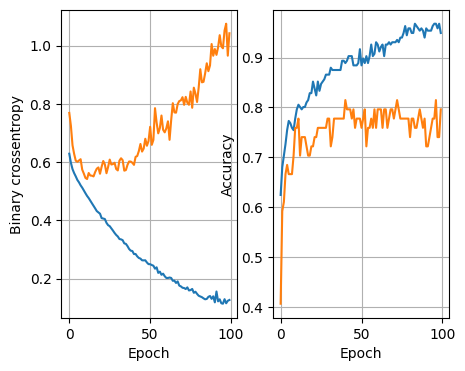

3/3 [==============================] - 0s 4ms/step - loss: 2.0211 - accuracy: 0.6145
16 nodes, dropout 0, lr 0.01, batch size 128


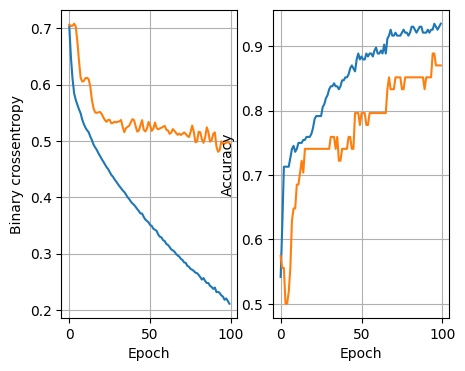

3/3 [==============================] - 0s 4ms/step - loss: 0.9843 - accuracy: 0.7349
16 nodes, dropout 0, lr 0.005, batch size 32


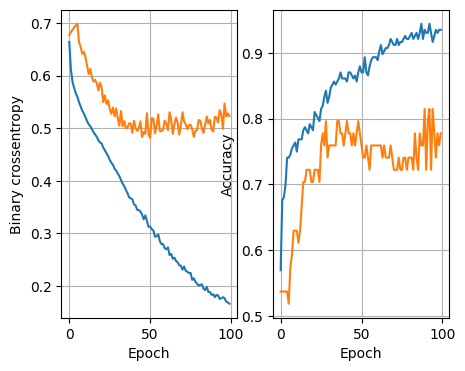

3/3 [==============================] - 0s 3ms/step - loss: 1.3862 - accuracy: 0.6627
16 nodes, dropout 0, lr 0.005, batch size 64


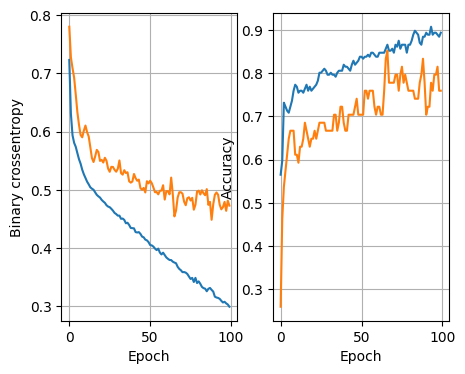

3/3 [==============================] - 0s 5ms/step - loss: 0.8603 - accuracy: 0.6386
16 nodes, dropout 0, lr 0.005, batch size 128


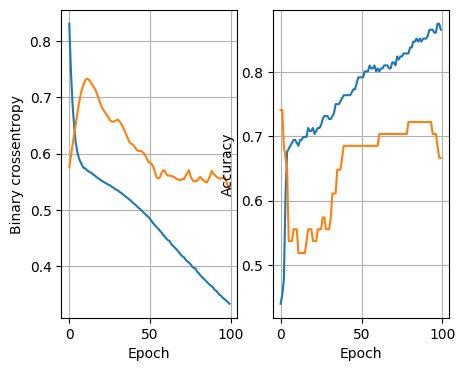

3/3 [==============================] - 0s 3ms/step - loss: 0.8696 - accuracy: 0.6506
16 nodes, dropout 0, lr 0.001, batch size 32


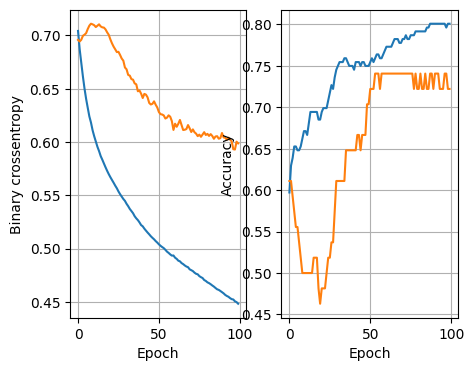

3/3 [==============================] - 0s 6ms/step - loss: 0.6685 - accuracy: 0.7349
16 nodes, dropout 0, lr 0.001, batch size 64


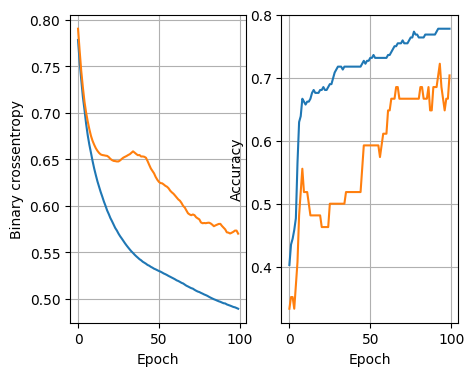

3/3 [==============================] - 0s 4ms/step - loss: 0.6326 - accuracy: 0.7470
16 nodes, dropout 0, lr 0.001, batch size 128


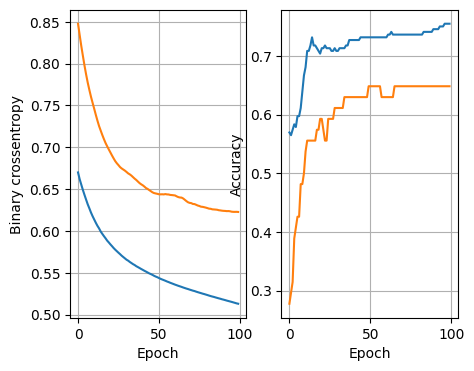

3/3 [==============================] - 0s 6ms/step - loss: 0.6179 - accuracy: 0.7229
16 nodes, dropout 0.2, lr 0.01, batch size 32


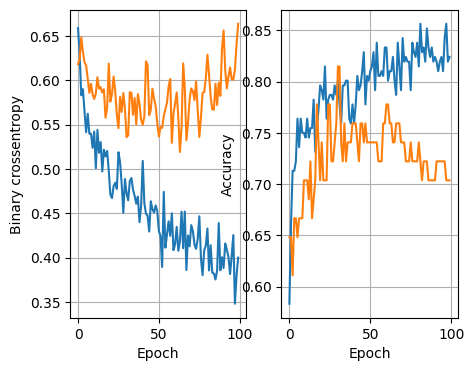

3/3 [==============================] - 0s 5ms/step - loss: 0.9483 - accuracy: 0.6867
16 nodes, dropout 0.2, lr 0.01, batch size 64


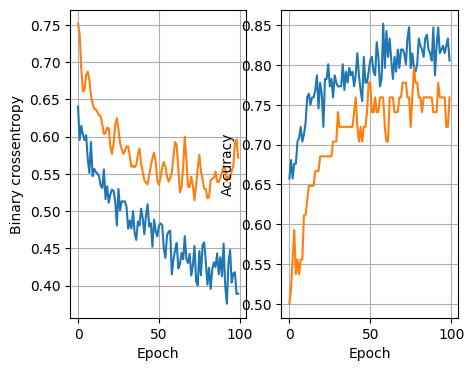

3/3 [==============================] - 0s 4ms/step - loss: 0.9553 - accuracy: 0.6867
16 nodes, dropout 0.2, lr 0.01, batch size 128


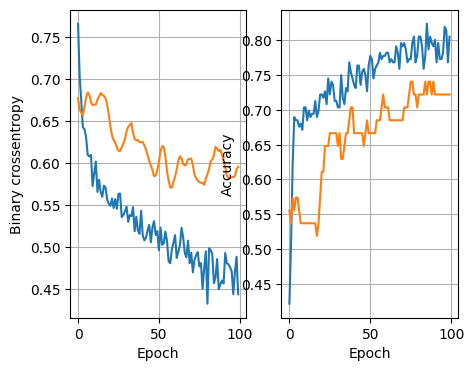

3/3 [==============================] - 0s 7ms/step - loss: 0.7684 - accuracy: 0.6867
16 nodes, dropout 0.2, lr 0.005, batch size 32


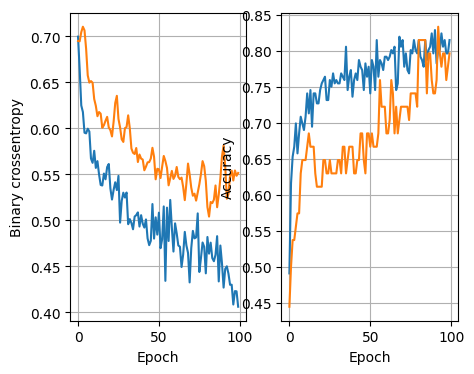

3/3 [==============================] - 0s 4ms/step - loss: 0.7698 - accuracy: 0.7108
16 nodes, dropout 0.2, lr 0.005, batch size 64


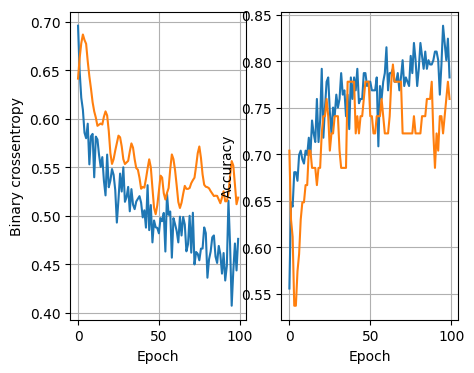

3/3 [==============================] - 0s 4ms/step - loss: 0.7088 - accuracy: 0.7349
16 nodes, dropout 0.2, lr 0.005, batch size 128


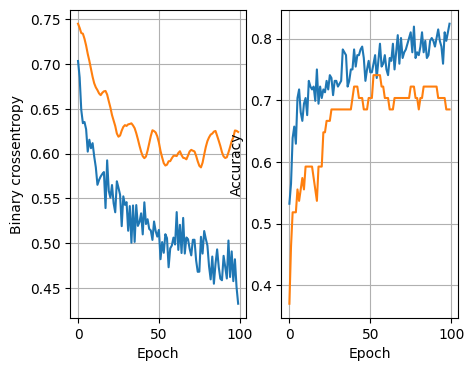

3/3 [==============================] - 0s 8ms/step - loss: 0.7199 - accuracy: 0.6867
16 nodes, dropout 0.2, lr 0.001, batch size 32


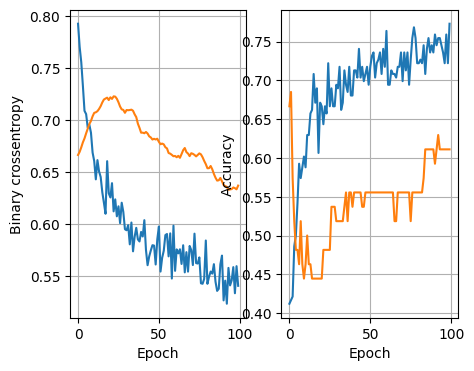

3/3 [==============================] - 0s 4ms/step - loss: 0.6165 - accuracy: 0.7590
16 nodes, dropout 0.2, lr 0.001, batch size 64


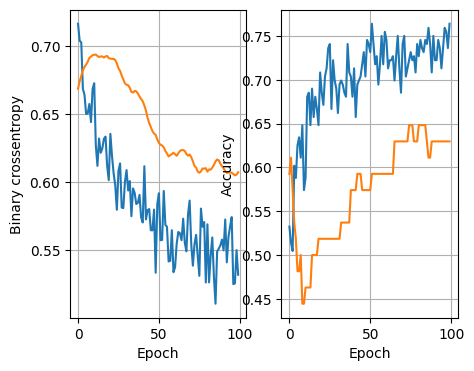

3/3 [==============================] - 0s 5ms/step - loss: 0.6147 - accuracy: 0.7470
16 nodes, dropout 0.2, lr 0.001, batch size 128


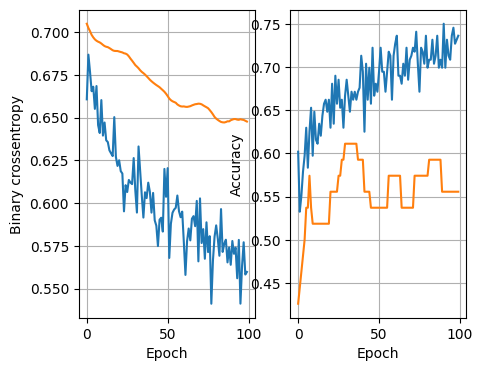

3/3 [==============================] - 0s 4ms/step - loss: 0.6276 - accuracy: 0.7229
32 nodes, dropout 0, lr 0.01, batch size 32


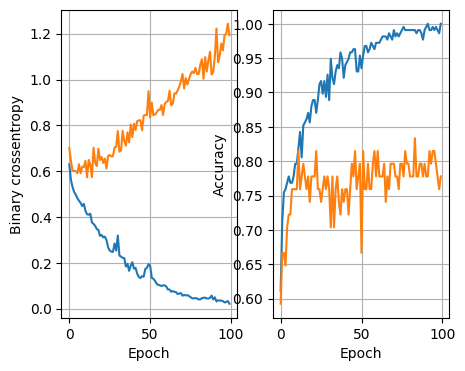

3/3 [==============================] - 0s 4ms/step - loss: 2.8304 - accuracy: 0.5904
32 nodes, dropout 0, lr 0.01, batch size 64


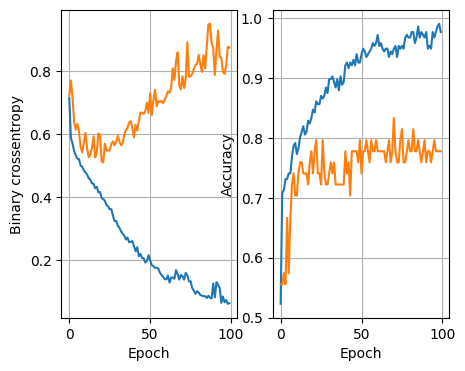

3/3 [==============================] - 0s 4ms/step - loss: 1.9797 - accuracy: 0.6145
32 nodes, dropout 0, lr 0.01, batch size 128


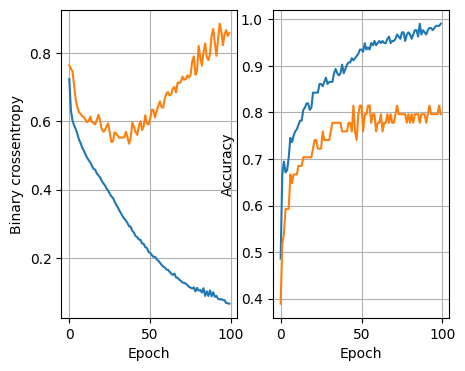

3/3 [==============================] - 0s 4ms/step - loss: 1.9277 - accuracy: 0.6265
32 nodes, dropout 0, lr 0.005, batch size 32


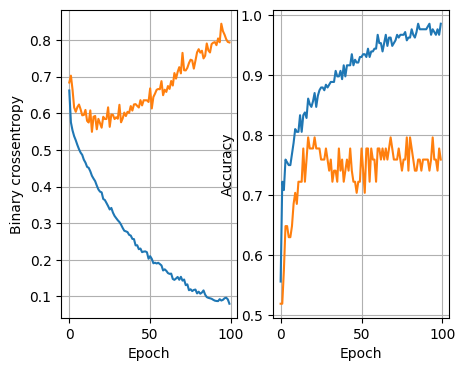

3/3 [==============================] - 0s 8ms/step - loss: 1.7688 - accuracy: 0.6627
32 nodes, dropout 0, lr 0.005, batch size 64


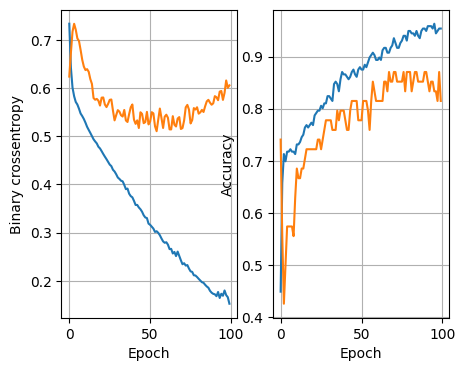

3/3 [==============================] - 0s 4ms/step - loss: 1.3303 - accuracy: 0.5904
32 nodes, dropout 0, lr 0.005, batch size 128


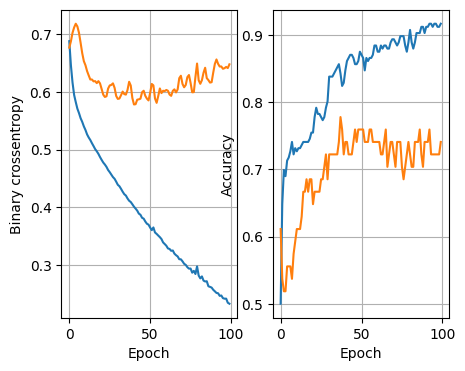

3/3 [==============================] - 0s 7ms/step - loss: 1.0217 - accuracy: 0.6627
32 nodes, dropout 0, lr 0.001, batch size 32


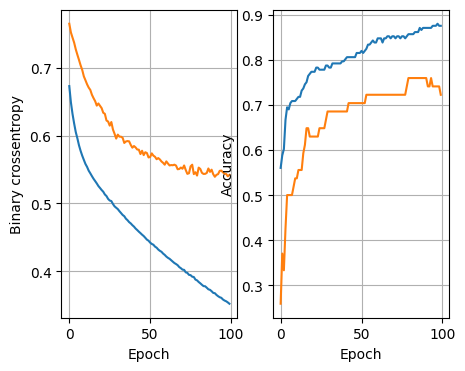

3/3 [==============================] - 0s 5ms/step - loss: 0.7648 - accuracy: 0.7349
32 nodes, dropout 0, lr 0.001, batch size 64


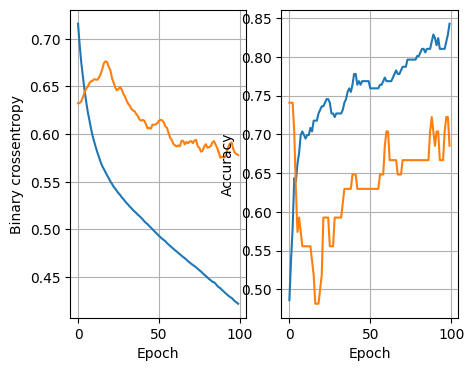

3/3 [==============================] - 0s 11ms/step - loss: 0.6904 - accuracy: 0.7108
32 nodes, dropout 0, lr 0.001, batch size 128


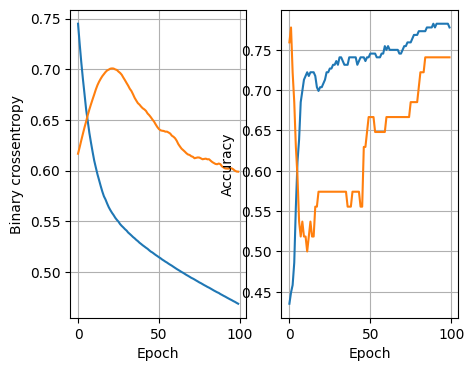

3/3 [==============================] - 0s 6ms/step - loss: 0.6391 - accuracy: 0.7349
32 nodes, dropout 0.2, lr 0.01, batch size 32


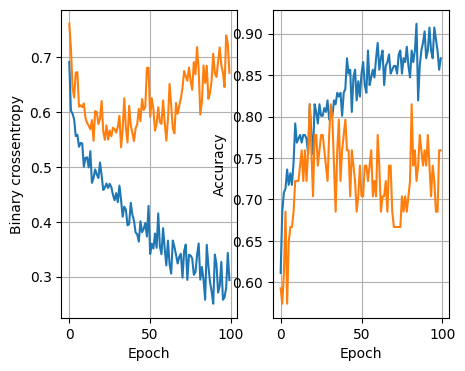

3/3 [==============================] - 0s 6ms/step - loss: 1.5252 - accuracy: 0.6747
32 nodes, dropout 0.2, lr 0.01, batch size 64


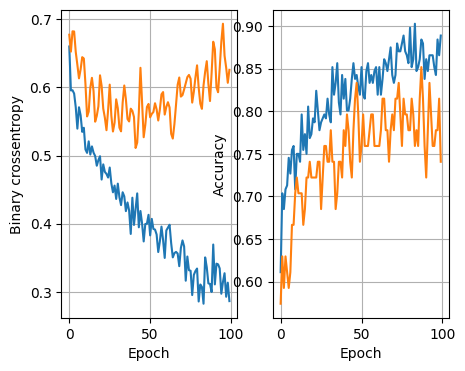

3/3 [==============================] - 0s 4ms/step - loss: 1.4508 - accuracy: 0.6386
32 nodes, dropout 0.2, lr 0.01, batch size 128


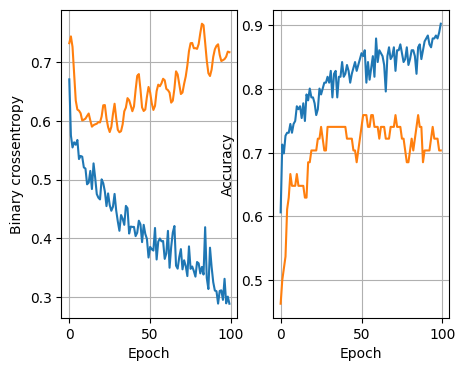

3/3 [==============================] - 0s 4ms/step - loss: 0.9989 - accuracy: 0.7349
32 nodes, dropout 0.2, lr 0.005, batch size 32


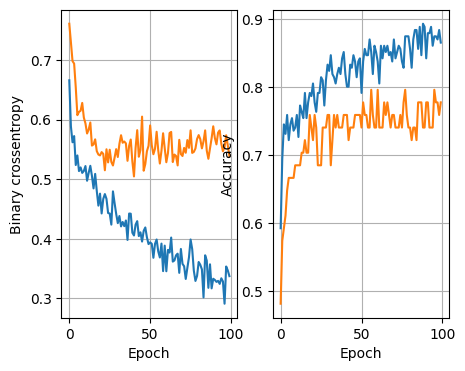

3/3 [==============================] - 0s 3ms/step - loss: 1.0737 - accuracy: 0.6506
32 nodes, dropout 0.2, lr 0.005, batch size 64


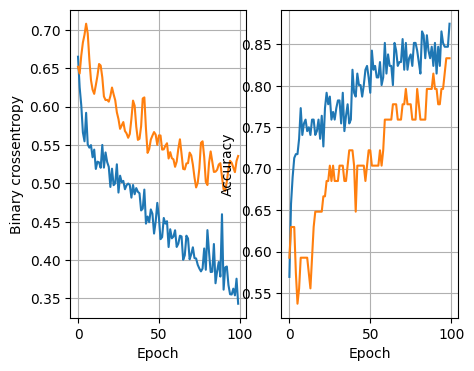

3/3 [==============================] - 0s 3ms/step - loss: 0.8284 - accuracy: 0.6867
32 nodes, dropout 0.2, lr 0.005, batch size 128


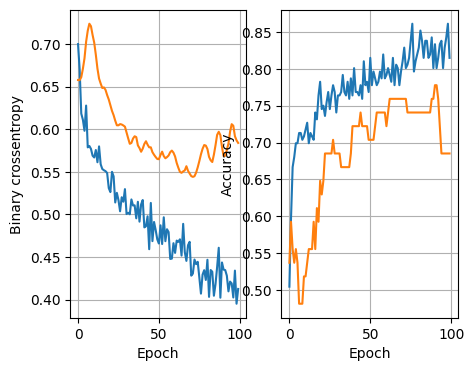

3/3 [==============================] - 0s 3ms/step - loss: 0.7930 - accuracy: 0.7229
32 nodes, dropout 0.2, lr 0.001, batch size 32


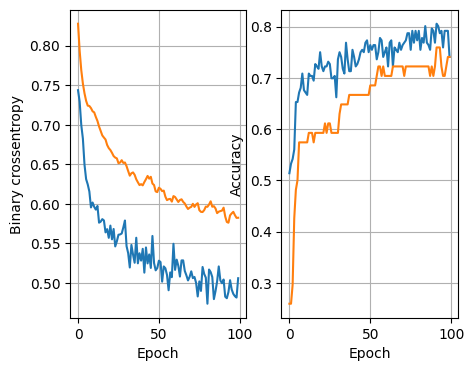

3/3 [==============================] - 0s 4ms/step - loss: 0.6649 - accuracy: 0.7349
32 nodes, dropout 0.2, lr 0.001, batch size 64


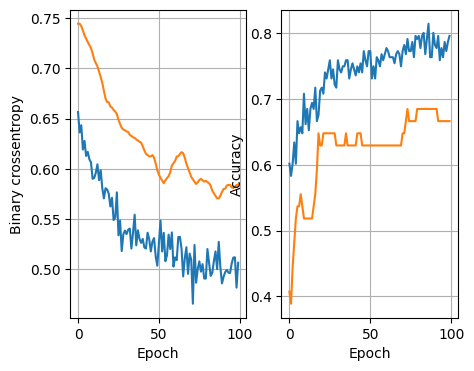

3/3 [==============================] - 0s 7ms/step - loss: 0.6425 - accuracy: 0.7349
32 nodes, dropout 0.2, lr 0.001, batch size 128


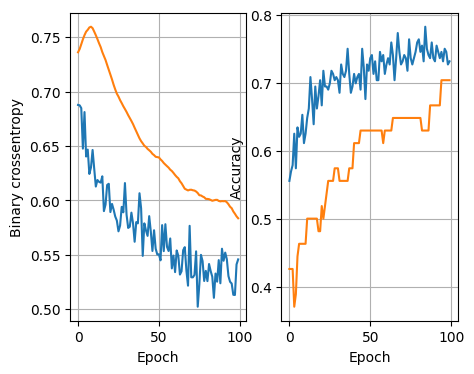

3/3 [==============================] - 0s 6ms/step - loss: 0.6286 - accuracy: 0.7108
64 nodes, dropout 0, lr 0.01, batch size 32


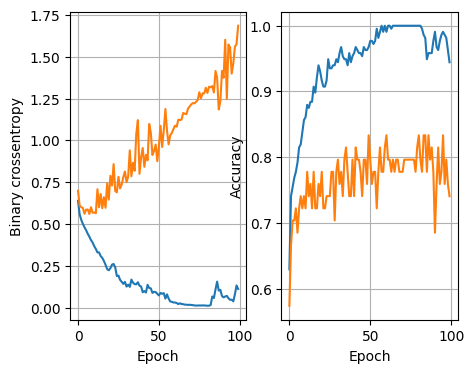

3/3 [==============================] - 0s 4ms/step - loss: 3.3746 - accuracy: 0.6145
64 nodes, dropout 0, lr 0.01, batch size 64


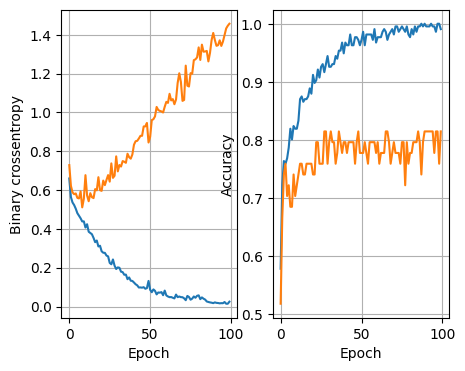

3/3 [==============================] - 0s 6ms/step - loss: 2.9009 - accuracy: 0.6747
64 nodes, dropout 0, lr 0.01, batch size 128


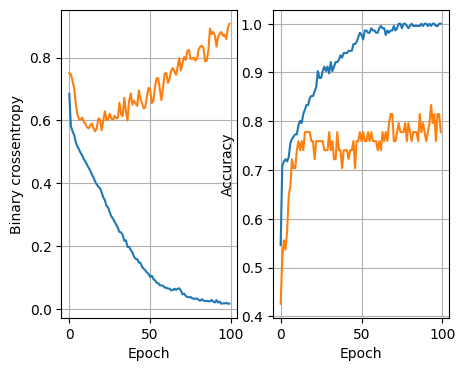

3/3 [==============================] - 0s 4ms/step - loss: 2.5745 - accuracy: 0.6867
64 nodes, dropout 0, lr 0.005, batch size 32


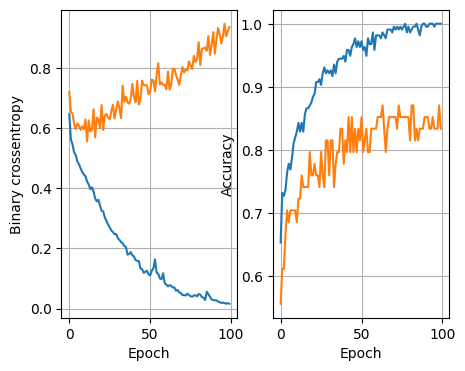

3/3 [==============================] - 0s 4ms/step - loss: 2.3921 - accuracy: 0.6506
64 nodes, dropout 0, lr 0.005, batch size 64


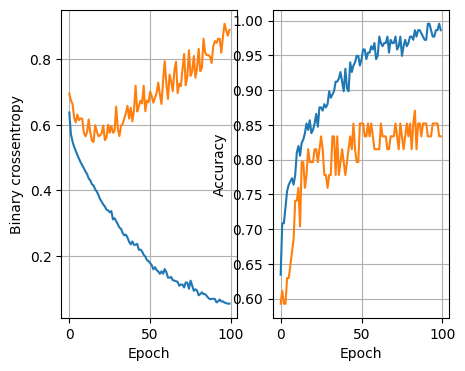

3/3 [==============================] - 0s 6ms/step - loss: 1.9482 - accuracy: 0.6265
64 nodes, dropout 0, lr 0.005, batch size 128


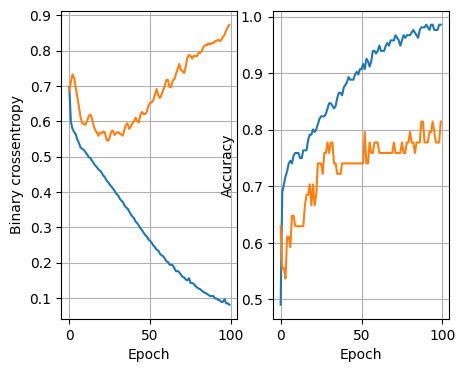

3/3 [==============================] - 0s 8ms/step - loss: 1.6648 - accuracy: 0.6386
64 nodes, dropout 0, lr 0.001, batch size 32


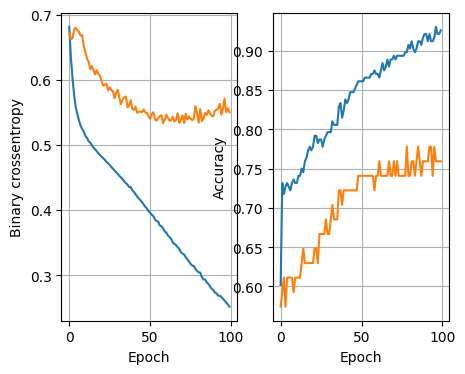

3/3 [==============================] - 0s 5ms/step - loss: 0.9684 - accuracy: 0.6506
64 nodes, dropout 0, lr 0.001, batch size 64


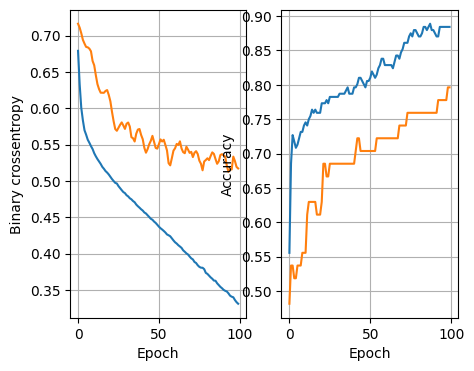

3/3 [==============================] - 0s 5ms/step - loss: 0.7445 - accuracy: 0.6867
64 nodes, dropout 0, lr 0.001, batch size 128


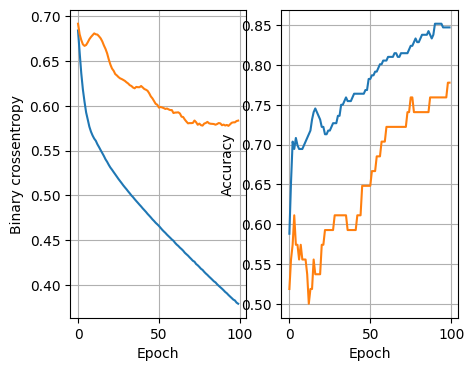

3/3 [==============================] - 0s 4ms/step - loss: 0.7297 - accuracy: 0.7229
64 nodes, dropout 0.2, lr 0.01, batch size 32


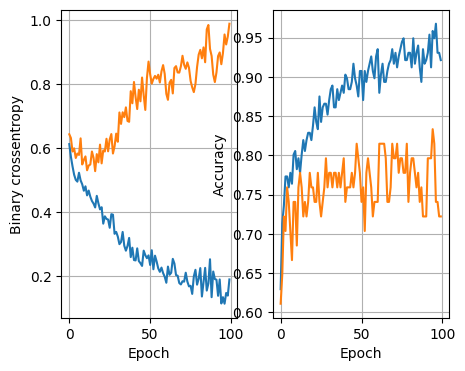

3/3 [==============================] - 0s 8ms/step - loss: 2.6613 - accuracy: 0.5663
64 nodes, dropout 0.2, lr 0.01, batch size 64


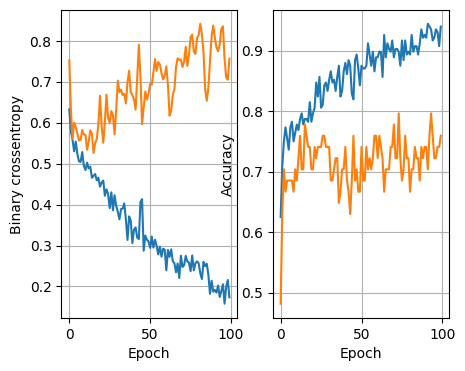

3/3 [==============================] - 0s 4ms/step - loss: 1.6908 - accuracy: 0.6265
64 nodes, dropout 0.2, lr 0.01, batch size 128


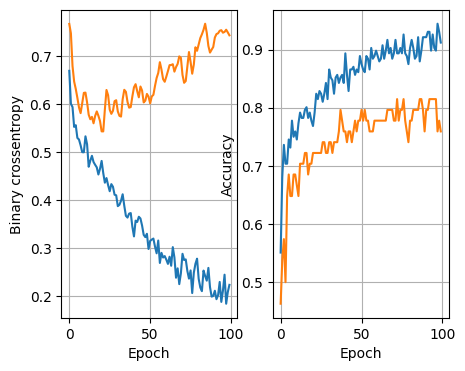

3/3 [==============================] - 0s 5ms/step - loss: 1.6200 - accuracy: 0.6386
64 nodes, dropout 0.2, lr 0.005, batch size 32


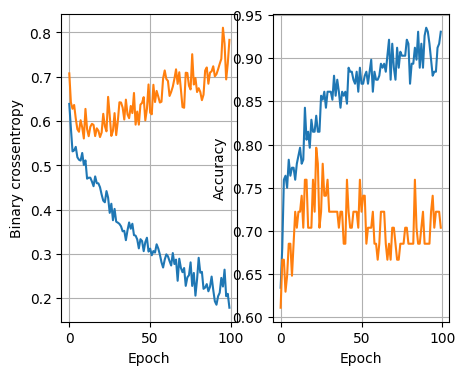

3/3 [==============================] - 0s 4ms/step - loss: 1.4555 - accuracy: 0.6506
64 nodes, dropout 0.2, lr 0.005, batch size 64


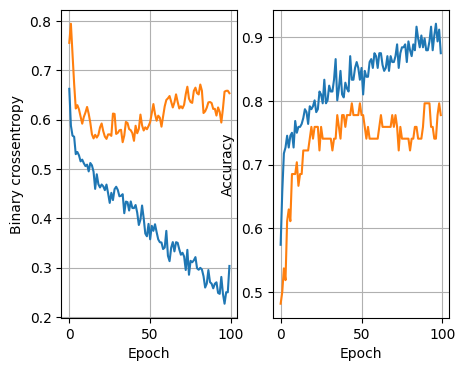

3/3 [==============================] - 0s 5ms/step - loss: 1.3272 - accuracy: 0.6747
64 nodes, dropout 0.2, lr 0.005, batch size 128


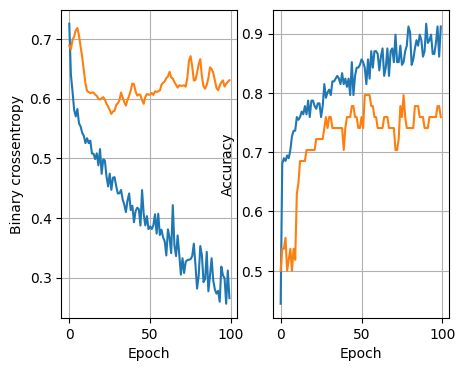

3/3 [==============================] - 0s 4ms/step - loss: 1.0915 - accuracy: 0.6506
64 nodes, dropout 0.2, lr 0.001, batch size 32


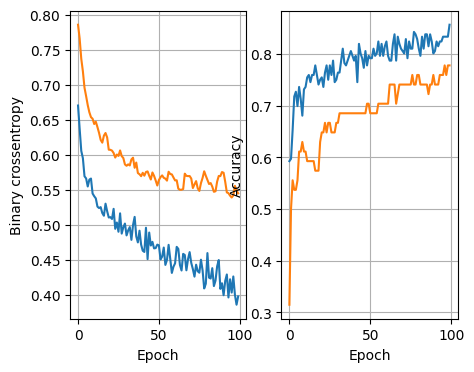

3/3 [==============================] - 0s 6ms/step - loss: 0.7143 - accuracy: 0.7470
64 nodes, dropout 0.2, lr 0.001, batch size 64


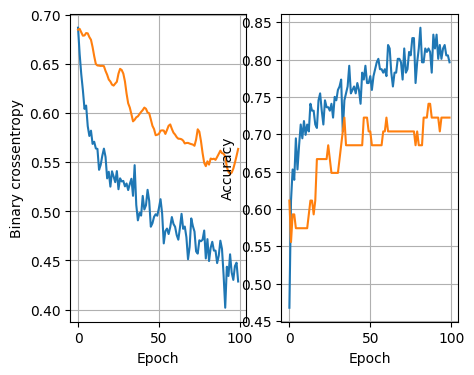

3/3 [==============================] - 0s 6ms/step - loss: 0.6681 - accuracy: 0.7349
64 nodes, dropout 0.2, lr 0.001, batch size 128


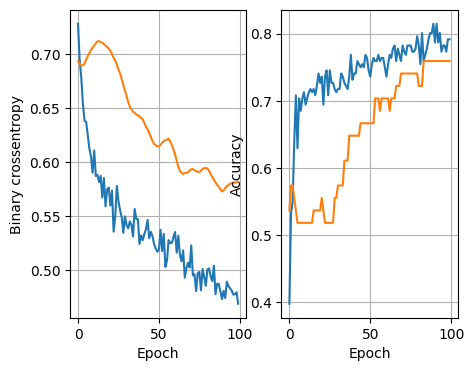

3/3 [==============================] - 0s 5ms/step - loss: 0.6428 - accuracy: 0.7349


In [152]:
print(X_train.shape)
print(y_train.shape)
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [153]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

3/3 [==============================] - 0s 3ms/step


In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        42
           1       0.82      0.56      0.67        41

    accuracy                           0.72        83
   macro avg       0.75      0.72      0.71        83
weighted avg       0.75      0.72      0.72        83

